In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Pandas 简介

pandas中最重要的数据结构有两种：Series 和 DataFrame，分别代表了序列数据与表格数据。

## Series

```python
In [5]: s = pd.Series([909976, 8615246, 2872086, 2273305])
In [6]: s
Out[6]: 0 909976
        1 8615246
        2 2872086
        3 2273305
        dtype: int64
```

提取索引与值
```python
In [7]: s.index
Out[7]: Int64Index([0, 1, 2, 3], dtype='int64')
In [8]: s.values
Out[8]: array([ 909976, 8615246, 2872086, 2273305])
```

使用标签替代索引
```python
In [9]: s.index = ["Stockholm", "London", "Rome", "Paris"]
In [10]: s.name = "Population"
In [11]: s
Out[11]: Stockholm 909976
        London 8615246
        Rome 2872086
        Paris 2273305
        Name: Population, dtype: int64
# 或者使用如下方式
s = pd.Series([909976, 8615246, 2872086, 2273305], name="Population",
              index=["Stockholm", "London", "Rome", "Paris"])
```

之后就可以按照如下方式访问数据：
```python
In [13]: s["London"]
Out[13]: 8615246
In [14]: s.Stockholm
Out[14]: 909976
In [15]: s[["Paris", "Rome"]]
Out[15]: Paris 2273305
        Rome 2872086
        Name: Population, dtype: int64
```

使用它提供的统计方法进行统计，如:
- `count` 统计数据的个数
- `median` 中位数
- `mean` 均值
- `std` 数据标准差
- `min`,`max` 最小值、最大值
- `quantile` 分位数

```python
In [16]: s.median(), s.mean(), s.std()
Out[16]: (2572695.5, 3667653.25, 3399048.5005155364)
In [17]: s.min(), s.max()
Out[17]: (909976, 8615246)
In [18]: s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)
Out[18]: (1932472.75, 2572695.5, 4307876.0)
```
或者直接使用 `describe` 来获取统计信息
```python
In [19]: s.describe()
Out[19]: count 4.000000
        mean 3667653.250000
        std 3399048.500516
        min 909976.000000
        25% 1932472.750000
        50% 2572695.500000
        75% 4307876.000000
        max 8615246.000000
        Name: Population, dtype: float64
```

绘图

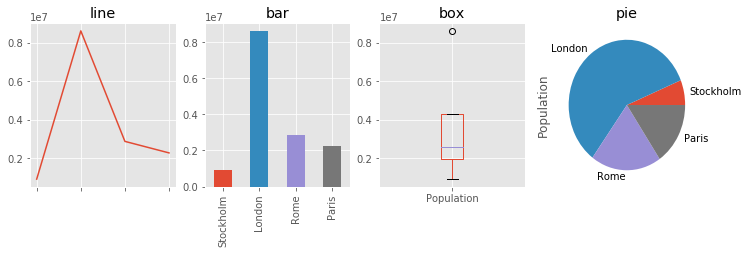

In [17]:
s = pd.Series([909976, 8615246, 2872086, 2273305], name="Population",
              index=["Stockholm", "London", "Rome", "Paris"])
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie')
plt.show()

## DataFrame

具有多种初始化的方法：
```python
In [21]: df = pd.DataFrame([[909976, "Sweden"],
                            [8615246, "United Kingdom"],
                            [2872086, "Italy"],
                            [2273305, "France"]])
In [22]: df
Out[22]:
          0       1
        0 909976  Sweden
        1 8615246 United Kingdom
        2 2872086 Italy
        3 2273305 France
```
对索引进行标签化：
```python
In [23]: df.index = ["Stockholm", "London", "Rome", "Paris"]
In [24]: df.columns = ["Population", "State"]
In [25]: df
Out[25]:
                    Population     State
        Stockholm   909976         Sweden
        London      8615246        United Kingdom
        Rome        2872086        Italy
        Paris       2273305        France
```

或者一次性完成创建
```python
# 传统方法
df = pd.DataFrame([[909976, "Sweden"],
                    [8615246, "United Kingdom"],
                    [2872086, "Italy"],
                    [2273305, "France"]],
                   index=["Stockholm", "London", "Rome", "Paris"],
                   columns=["Population", "State"])
# 更简便的方法是使用字典
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                   "State": ["Sweden", "United Kingdom", "Italy", "France"]},
                  index=["Stockholm", "London", "Rome", "Paris"])
```

访问方法与 Series 类似：
```python
# 访问列属性
In [28]: df.Population
Out[28]: Stockholm 909976
        London 8615246
        Rome 2872086
        Paris 2273305
        Name: Population, dtype: int64

# 通过索引访问
In [29]: df.ix["Stockholm"]
Out[29]: Population 909976
        State Sweden
        Name: Stockholm, dtype: object
# 访问多条
In [30]: df.ix[["Paris", "Rome"]]
Out[30]:
                Population   State
        Paris   2273305      France
        Rome    2872086      Italy

# 同时访问行与列
In [31]: df.ix[["Paris", "Rome"], "Population"]
Out[31]: Paris 2273305
        Rome 2872086
        Name: Population, dtype: int64
```

使用 `info` 可以查看相关数据集的信息：
```python
In [33]: df.info()
        <class 'pandas.core.frame.DataFrame'>
        Index: 4 entries, Stockholm to Paris
        Data columns (total 2 columns):
        Population 4 non-null int64
        State 4 non-null object
        dtypes: int64(1), object(1)
        memory usage: 96.0+ bytes
In [34]: df.dtypes
Out[34]: Population int64
        State object
        dtype: object
```

设置索引：
```python
In [44]: df_pop2 = df_pop.set_index("City")
In [45]: df_pop2 = df_pop2.sort_index()
In [46]: df_pop2.head()
```
![image](https://wx1.sinaimg.cn/large/69d4185bly1fyb56ebpjdj20gj04jjs4.jpg)

层次索引：
```python
In [47]: df_pop3 = df_pop.set_index(["State", "City"]).sortlevel(0)
In [48]: df_pop3.head(7)
```
![image](https://ws3.sinaimg.cn/large/69d4185bly1fyb57ginyvj20d705x751.jpg)

有了层次索引之后，就可以使用部分索引进行数据访问，当然可以是使用全部的索引：
```python
# 部分索引
In [49]: df_pop3.ix["Sweden"]
```
![image](https://ws2.sinaimg.cn/large/69d4185bly1fyb5gh4i6qj20ei03bwev.jpg)

```python
# 全部索引
In [50]: df_pop3.ix[("Sweden", "Gothenburg")]
Out[50]: Rank 53
        Population 528,014
        Date of census 31 March 2013
        NumericPopulation 528014
        Name: (Sweden, Gothenburg), dtype: object
```

排序
```python
In [51]: df_pop.set_index("City").sort(["State", "NumericPopulation"],
                                       ascending=[False, True]).head()
```
![image](https://wx1.sinaimg.cn/large/69d4185bly1fyb5jkqkdgj20gn04lq3r.jpg)

统计与汇总
```python
In [52]: city_counts = df_pop.State.value_counts()
In [53]: city_counts.head()
Out[53]: Germany 19
        United Kingdom 16
        Spain 13
        Poland 10
        Italy 10
        dtype: int64
```
分层汇总
```python
In [54]: df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])
In [55]: df_pop4 = df_pop3.sum(level="State").sort("NumericPopulation", ascending=False)
In [56]: df_pop4.head()
Out[56]:
                      NumericPopulation
    State
    United Kingdom    16011877
    Germany           15119548
    Spain             10041639
    Italy             8764067
    Poland            6267409
```

使用 `drop` 可以去除列(axis=1)或者行(axis=0)，使用 `group` 进行分组。
```python
df_pop5 = (df_pop.drop("Rank", axis=1)
           .groupby("State").sum()
           .sort("NumericPopulation", ascending=False))
```

## 时间数据

Pandas 提供了 `DatatimeIndex` 和 `PeriodIndex` 来处理时间数据。使用 `date_range` 可以用于生成时间间隔数据，其返回的数据也可以作为索引：
```python
# 默认间隔是天(D)
In [59]: pd.date_range("2015-1-1", periods=31)
Out[59]: <class 'pandas.tseries.index.DatetimeIndex'>
        [2015-01-01, ..., 2015-01-31]
        Length: 31, Freq: D, Timezone: None
# 指定频率
In [60]: pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")
Out[60]: <class 'pandas.tseries.index.DatetimeIndex'>
        [2015-01-01 00:00:00, ..., 2015-01-01 12:00:00]
        Length: 13, Freq: H, Timezone: None

# 将时间作为索引
In [61]: ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))
In [62]: ts1.head()
Out[62]: 2015-01-01 0
        2015-01-02 1
        2015-01-03 2
        2015-01-04 3
        2015-01-05 4
        Freq: D, dtype: int64
In [63]: ts1["2015-1-3"]
Out[63]: 2
In [64]: ts1.index[2]
Out[64]: Timestamp('2015-01-03 00:00:00', offset='D')
```

对于时间的操作：
```python
In [65]: ts1.index[2].year, ts1.index[2].month, ts1.index[2].day
Out[65]: (2015, 1, 3)
In [66]: ts1.index[2].nanosecond
Out[66]: 0

# python 标准时间类型转换
In [67]: ts1.index[2].to_pydatetime()
Out[67]: datetime.datetime(2015, 1, 3, 0, 0)

In [68]: import datetime
In [69]: ts2 = pd.Series(np.random.rand(2),
                         index=[datetime.datetime(2015, 1, 1), 
                                datetime.datetime(2015, 2, 1)])
In [70]: ts2
Out[70]: 2015-01-01 0.683801
        2015-02-01 0.916209
        dtype: float64
```

周期索引 `PeriodIndex`
```python
In [71]: periods = pd.PeriodIndex([pd.Period('2015-01'),
                                   pd.Period('2015-02'),
                                   pd.Period('2015-03')])
In [72]: ts3 = pd.Series(np.random.rand(3), index=periods)
In [73]: ts3
Out[73]: 2015-01 0.969817
        2015-02 0.086097
        2015-03 0.016567
        Freq: M, dtype: float64
In [74]: ts3.index
Out[74]: <class 'pandas.tseries.period.PeriodIndex'>
        [2015-01, ..., 2015-03]
        Length: 3, Freq: M
```
将时间类型索引转换成周期性索引
```python
# 频率为 M（month）
In [75]: ts2.to_period('M')
Out[75]: 2015-01 0.683801
        2015-02 0.916209
        Freq: M, dtype: float64
```

如果是时间索引，那么可以直接进行比较，如：
```python
In [87]: mask_jan = (df1.index >= "2014-1-1") & (df1.index < "2014-2-1")
In [88]: df1_jan = df1[mask_jan]
In [89]: df1_jan.info()
    <class 'pandas.core.frame.DataFrame'>
    DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
    Data columns (total 1 columns):
    outdoor 4452 non-null float64
    dtypes: float64(1) memory usage: 69.6 KB
```
时间切片：
```python
In [90]: df2_jan = df2["2014-1-1":"2014-1-31"]
```

连接可以使用 `join` 和 `concat` 方法。 `resmaple` 可以进行重采样。

# Seaborn

In [19]:
import seaborn as sns
sns.set(style="darkgrid")

基于 Matplotlib 建立，常用于统计分析和可视化。

/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


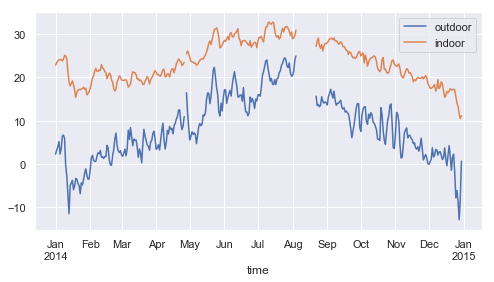

In [59]:
# 读取户外数据并编辑数据
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t",
                  names=["time", "outdoor"])
df1.time = (pd.to_datetime(df1.time.values, unit="s")
            .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1 = df1.set_index("time").resample("10min").mean()

# 添加室内数据并编辑数据
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t",
                  names=["time", "indoor"])
df2.time = (pd.to_datetime(df2.time.values, unit="s")
            .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time").resample("10min").mean()

# 连接两组数据
df_temp = pd.concat([df1, df2], axis=1)
# 绘图
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

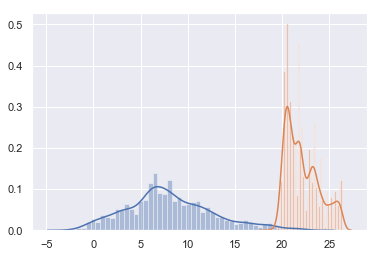

In [60]:
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50);

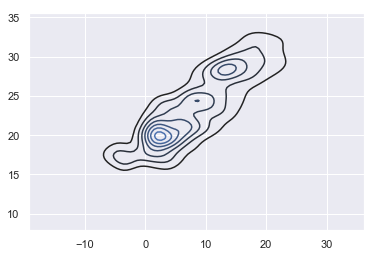

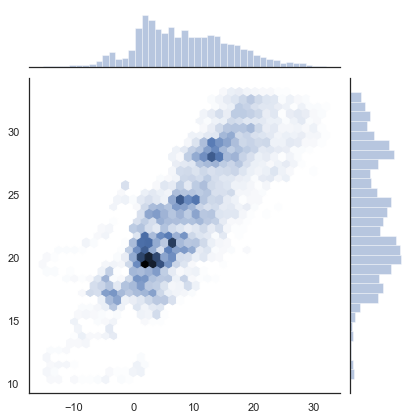

In [61]:
sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values,
            df_temp.resample("H").mean()["indoor"].dropna().values, 
            shade=False)
with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()["outdoor"].values,
                  df_temp.resample("H").mean()["indoor"].values, 
                  kind="hex")

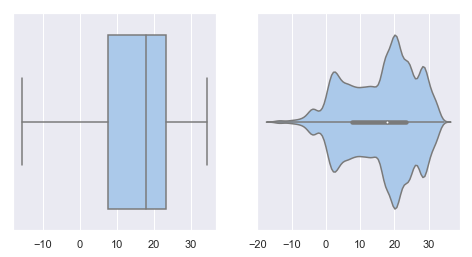

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(df_temp.dropna(), ax=ax2, palette="pastel")

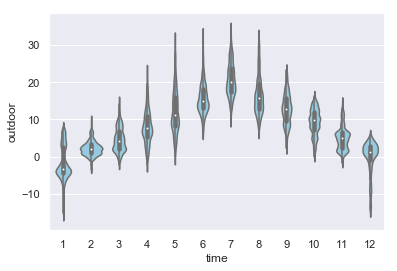

In [63]:
sns.violinplot(x=df_temp.dropna().index.month,
               y=df_temp.dropna().outdoor, color="skyblue");

热点图

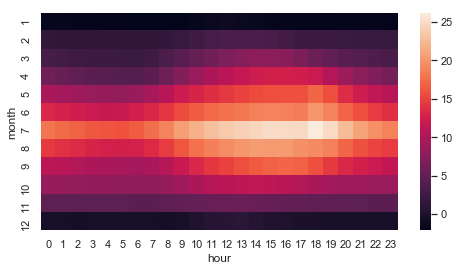

In [64]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour
table = pd.pivot_table(df_temp, values='outdoor', index=['month'],
                       columns=['hour'], aggfunc=np.mean)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax)